In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [4]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly


def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    losses_tr = []
    losses_te = []
    for k_ in range(k):
        # get k'th subgroup in test, others in train:
        ind_te = k_indices[k_]
        ind_tr = k_indices[~(np.arange(k_indices.shape[0]) == k_)]
        ind_tr = ind_tr.reshape(-1)
        x_tr, x_te, y_tr, y_te = x[ind_tr], x[ind_te], y[ind_tr], y[ind_te]
        # form data with polynomial degree:
        tx_tr = build_poly(x_tr, degree)
        tx_te = build_poly(x_te, degree)
        # ridge regression:
        mse_tr, w = ridge_regression(y_tr, tx_tr, lambda_)
        mse_te = compute_mse(y_te, tx_te, w)
        # calculate the loss for train and test data:
        losses_tr.append(mse_tr)
        losses_te.append(mse_te)

    loss_tr = np.mean(losses_tr)
    loss_te = np.mean(losses_te)
    return loss_tr, loss_te

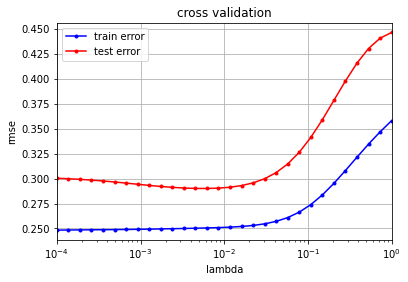

In [5]:
from plots import cross_validation_visualization


def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    for lambda_ in lambdas:
        # cross validation
        mse_tr, mse_te = cross_validation(y, x, k_indices, k_fold, lambda_, degree)

        # calculate RMSE for train and test data,
        # and store them in rmse_tr and rmse_te respectively
        rmse_tr.append(np.sqrt(2 * mse_tr))
        rmse_te.append(np.sqrt(2 * mse_te))

    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

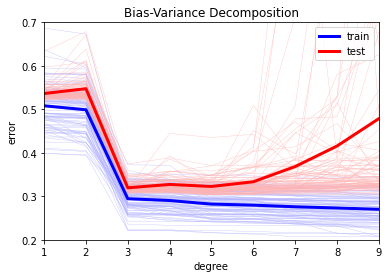

In [6]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization


def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # split data with a specific seed:
        x_tr, x_te, y_tr, y_te = split_data(x, y, ratio_train, seed)
        # bias_variance_decomposition:
        for index_degree, degree in enumerate(degrees):
            # form the data
            tx_tr = build_poly(x_tr, degree)
            tx_te = build_poly(x_te, degree)
            # least square and calculate RMSE
            mse_tr, w = least_squares(y_tr, tx_tr)
            mse_te = compute_mse(y_te, tx_te, w)
            rmse_tr[index_seed, index_degree] = np.sqrt(2 * mse_tr)
            rmse_te[index_seed, index_degree] = np.sqrt(2 * mse_te)

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()